# Text Analysis using N-grams


Gomathi A



> 1a. Import and install required libraries



In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
#Downloading required libraries in nltk
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('punkt')

!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Importing necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!




> 1b. Read input file allreviews.csv



In [ ]:
#Reading and displaying (few) records from allreviews.csv
allreviews_df = pd.read_csv("allreviews.csv",sep=",")
allreviews_df.head(100)

,ASIN,ProductFlavor,ProductName,ProductNumReviews,RetrievedTime,ReviewContent,ReviewDomain,ReviewEarly,ReviewHelpful,ReviewId,ReviewLink,ReviewStar,ReviewTime,ReviewVerifiedP,ReviewVine,ReviewersId,ReviewersName,ProcessedText,VaderScore,Effectiveness
0,B0021FEMZG,Chocolate,PlantFusion Complete Plant Based Pea Protein P...,4762,2020-07-22,Used to love this protein shake. A little bit ...,amazon.com,0,584,R24DK56XHP10W8,/gp/customer-reviews/R24DK56XHP10W8,2.0,2018-09-01,1,0,AFJ2JYCF6YCW65ZW7AV2J4YO5MIQ,arrow,use love protein shake little bite sweeter oth...,0.8494,0.0
1,B00I01ZXYE,Flavor_absent,ONE ORGANIC Sushi Nori Premium Roasted Organic...,955,2020-07-22,"One Organic Sushi Nori, 50 sheets = https://ww...",amazon.com,0,92,R2W0O1EYHJDT25,/gp/customer-reviews/R2W0O1EYHJDT25,5.0,2016-10-09,1,0,AHLUVLLSOY2YGWT3H3BWMNB5LREQ,Daniel,one organic sushi nori sheet https www amazon ...,-0.5859,0.0
2,B0021FEMZG,Natural - No Stevia,PlantFusion Complete Plant Based Pea Protein P...,4762,2020-07-22,"Product contains guar gum, AKA carrageenan. Lo...",amazon.com,0,376,R2M5RMJ8V2KT34,/gp/customer-reviews/R2M5RMJ8V2KT34,1.0,2018-09-01,1,0,AHJCHLZ4PJNFAGRZCNJTELPUEJGA,sam smalls,product contain guar gum aka carrageenan look ...,-0.8176,0.0
3,B00I01ZXYE,Flavor_absent,ONE ORGANIC Sushi Nori Premium Roasted Organic...,955,2020-07-22,If I had known this was made in China I would ...,amazon.com,0,37,R16CTB42DC89CS,/gp/customer-reviews/R16CTB42DC89CS,1.0,2019-03-04,1,0,AFRKGOJKOYKAS4HBZNMIROHY6TZQ,josephine,know make china would buy throw mine eat leave...,0.4310,0.0
4,B083SFBKPT,Flavor_absent,"Agar Agar Powder 2oz : Gelatin Substitute, Veg...",587,2020-07-22,This was my first try with this agar-agar and ...,amazon.com,0,152,R2ZH1V4P2CQEN,/gp/customer-reviews/R2ZH1V4P2CQEN,5.0,2017-08-14,1,0,AGXFL2IGLMYHAQFPSA3PSMBD7IHA,Lisa D Ramsey,first try agar agar work great follow instruct...,0.8908,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,B00YQS8ED2,Berry,"Country Farms Super Green Drink, Berry Flavor,...",549,2020-07-22,"Item is not as advertised, does not contain th...",amazon.com,0,18,R2DL03S8BCXWB2,/gp/customer-reviews/R2DL03S8BCXWB2,1.0,2018-01-07,1,0,AH42T7OVXUBWGNTBJNFWT3UPCIFQ,Katie B,item advertise contain mushroom complex list d...,0.0000,0.0
96,B000MGSJ5A,Flavor_absent,"NOW Foods, Agar Pure Powder, Vegetarian Substi...",463,2020-07-22,I got this since this said it's a substitute f...,amazon.com,0,1,R3XMTWN04B6AR,/gp/customer-reviews/R3XMTWN04B6AR,1.0,2020-06-21,1,0,AHYJ3G652PEBNX6DECFOREWKRV3Q,Kiran Yalasangi,get since say substitute gelatin want make man...,0.9687,0.0
97,B002EUZEVY,Flavor_absent,Fresh Whole Leaf Irish Moss - Raw - 16 oz,259,2020-07-22,The moss I received is from Indonesia. Has ver...,amazon.com,0,98,R11FB3181B2K0Q,/gp/customer-reviews/R11FB3181B2K0Q,1.0,2018-04-29,1,0,AHP4WPSPJGVCIV6UVSAIRV5EOOBQ,NATALYA Melnik,moss receive indonesia strong bleach smell sta...,-0.7199,0.0
98,B00YQS8ED2,Chocolate,"Country Farms Super Green Drink, Berry Flavor,...",549,2020-07-22,I’ve been using this product for years. Unfort...,amazon.com,0,2,R3IOE7TMQJ2HG8,/gp/customer-reviews/R3IOE7TMQJ2HG8,3.0,2020-02-17,1,0,AHBULV5MOJDZPNDGJDE6LNED7XAA,DrK,use product years unfortunately certain formul...,0.8374,0.0


In [ ]:
#Count total number of input records
totalcount = allreviews_df.count
print("Total reviews in ", totalcount)

Total reviews in  <bound method DataFrame.count of                                         ASIN  ... Effectiveness
0                                 B0021FEMZG  ...           0.0
1                                 B00I01ZXYE  ...           0.0
2                                 B0021FEMZG  ...           0.0
3                                 B00I01ZXYE  ...           0.0
4                                 B083SFBKPT  ...           0.0
...                                      ...  ...           ...
1538794                           B07N48MTTH  ...           1.0
1538795  B077MYP6H8?reviewerType=all_reviews  ...           0.0
1538796                           B07N48MTTH  ...           1.0
1538797                           B07N48MTTH  ...           0.0
1538798                           B07N48MTTH  ...           1.0

[1538799 rows x 20 columns]>


In [ ]:
#Drop duplicate records with subset "ASIN", "ProductName","ProductFlavor","ReviewId", "ReviewContent"
allreview_df.drop_duplicates(subset=["ASIN", "ProductName","ProductFlavor","ReviewId", "ReviewContent"], keep='first', inplace=True)

#Drop empty reviews
allreview_df.dropna(subset=['ReviewContent'], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Display total number of records in input after removing duplicates
totalcount = allreview_df.count
print("Total reviews in ", totalcount)

Total reviews in  <bound method DataFrame.count of                                         ASIN  ...      ReviewersName
0                                 B0021FEMZG  ...              arrow
1                                 B00I01ZXYE  ...             Daniel
2                                 B0021FEMZG  ...         sam smalls
3                                 B00I01ZXYE  ...          josephine
4                                 B083SFBKPT  ...      Lisa D Ramsey
...                                      ...  ...                ...
1538787  B077MYP6H8?reviewerType=all_reviews  ...    Amazon Customer
1538789  B077MYP6H8?reviewerType=all_reviews  ...           rnorwood
1538791  B077MYP6H8?reviewerType=all_reviews  ...    Amazon Customer
1538793  B077MYP6H8?reviewerType=all_reviews  ...             Briana
1538795  B077MYP6H8?reviewerType=all_reviews  ...  Clifton Park Mama

[1330843 rows x 17 columns]>


In [ ]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Function to clean ReviewContent
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # lemmatize text
    #text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    lemmatizer=WordNetLemmatizer()
    text=[lemmatizer.lemmatize(x) for x in text]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
allreview_df["ReviewContent_Clean"] = allreview_df["ReviewContent"].apply(lambda x: clean_text(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
#Renaming the index column
allreview_df.index.names = ['allreview_idx']

In [ ]:
#Display few input records
allreview_df.head(5)

,ASIN,ProductFlavor,ProductName,ProductNumReviews,RetrievedTime,ReviewContent,ReviewDomain,ReviewEarly,ReviewHelpful,ReviewId,ReviewLink,ReviewStar,ReviewTime,ReviewVerifiedP,ReviewVine,ReviewersId,ReviewersName,ReviewContent_Clean
allreview_idx,,,,,,,,,,,,,,,,,,
0,B0021FEMZG,Chocolate,PlantFusion Complete Plant Based Pea Protein P...,4762,2020-07-22,Used to love this protein shake. A little bit ...,amazon.com,0,584,R24DK56XHP10W8,/gp/customer-reviews/R24DK56XHP10W8,2.0,2018-09-01,1,0,AFJ2JYCF6YCW65ZW7AV2J4YO5MIQ,arrow,used love protein shake little bit sweeter oth...
1,B00I01ZXYE,Flavor_absent,ONE ORGANIC Sushi Nori Premium Roasted Organic...,955,2020-07-22,"One Organic Sushi Nori, 50 sheets = https://ww...",amazon.com,0,92,R2W0O1EYHJDT25,/gp/customer-reviews/R2W0O1EYHJDT25,5.0,2016-10-09,1,0,AHLUVLLSOY2YGWT3H3BWMNB5LREQ,Daniel,one organic sushi nori sheet gold standard ama...
2,B0021FEMZG,Natural - No Stevia,PlantFusion Complete Plant Based Pea Protein P...,4762,2020-07-22,"Product contains guar gum, AKA carrageenan. Lo...",amazon.com,0,376,R2M5RMJ8V2KT34,/gp/customer-reviews/R2M5RMJ8V2KT34,1.0,2018-09-01,1,0,AHJCHLZ4PJNFAGRZCNJTELPUEJGA,sam smalls,product contains guar gum aka carrageenan look...
3,B00I01ZXYE,Flavor_absent,ONE ORGANIC Sushi Nori Premium Roasted Organic...,955,2020-07-22,If I had known this was made in China I would ...,amazon.com,0,37,R16CTB42DC89CS,/gp/customer-reviews/R16CTB42DC89CS,1.0,2019-03-04,1,0,AFRKGOJKOYKAS4HBZNMIROHY6TZQ,josephine,known made china would bought threw mine eatin...
4,B083SFBKPT,Flavor_absent,"Agar Agar Powder 2oz : Gelatin Substitute, Veg...",587,2020-07-22,This was my first try with this agar-agar and ...,amazon.com,0,152,R2ZH1V4P2CQEN,/gp/customer-reviews/R2ZH1V4P2CQEN,5.0,2017-08-14,1,0,AGXFL2IGLMYHAQFPSA3PSMBD7IHA,Lisa D Ramsey,first try agar-agar worked great follow instru...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


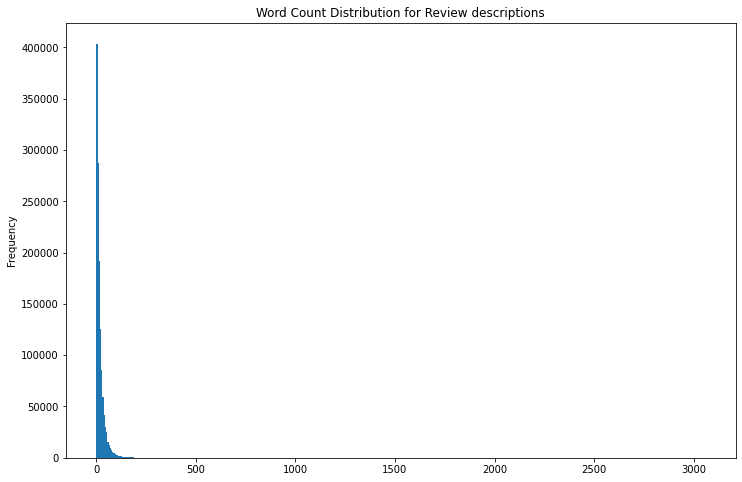

In [ ]:
# Calculating the word count for Review description
allreview_df['word_count'] = allreview_df['ReviewContent_Clean'].apply(lambda x: len(str(x).split()))# Plotting the word count
allreview_df['word_count'].plot(
    kind='hist',
    bins = 500,
    figsize = (12,8),title='Word Count Distribution for Review descriptions')

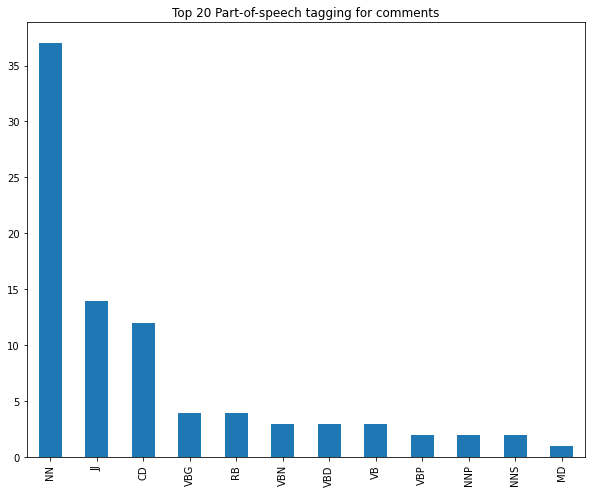

In [ ]:
#Part of speech tagging for review comments
from textblob import TextBlob
blob = TextBlob(str(allreview_df['ReviewContent_Clean']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 20 Part-of-speech tagging for comments")

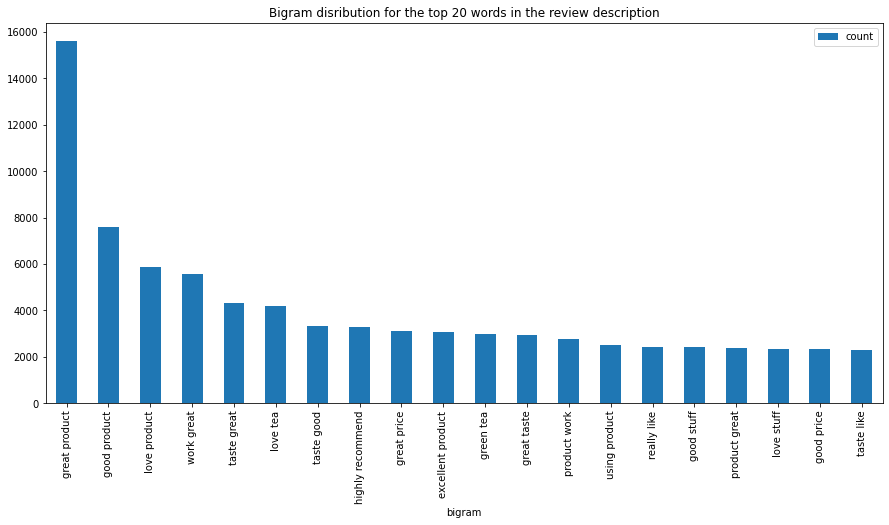

In [ ]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(allreview_df['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the review description", figsize = (15,7), )


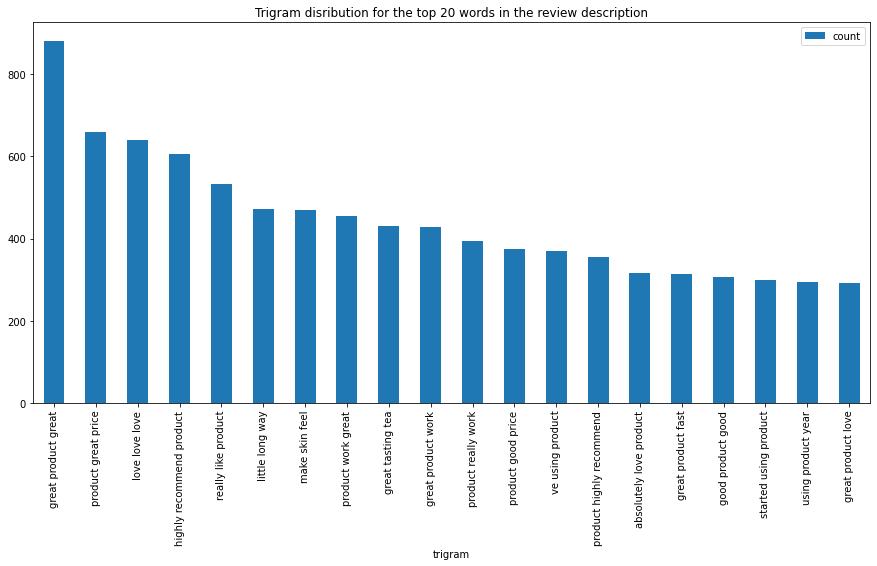

In [ ]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(allreview_df['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram = trigram.head(20)

#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Trigram disribution for the top 20 words in the review description", figsize = (15,7), )


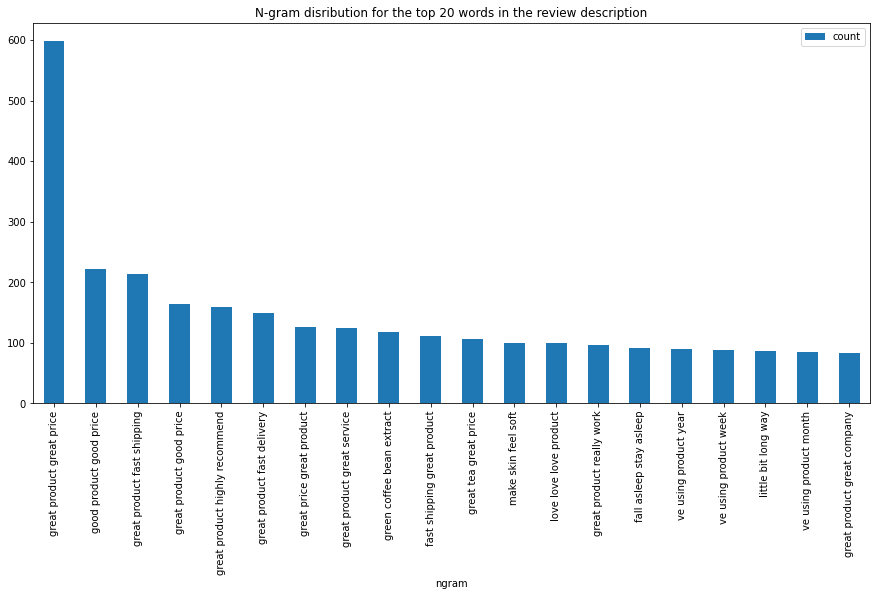

In [ ]:
#Converting text descriptions into vectors using TF-IDF using N-gram
tf = TfidfVectorizer(ngram_range=(4, 4), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(allreview_df['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)   #converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 20 records
ngram1 = ngram.head(20)

#Plotting the n-gram distribution
ngram1.plot(x ='ngram', y='count', kind = 'bar', title = "N-gram disribution for the top 20 words in the review description", figsize = (15,7), )
